## Linear Regression with scikit-learn and Boston dataset
使用scikit-learn程式庫以及波士頓房產資料集做線性回歸分析

In [115]:
# https://towardsdatascience.com/linear-regression-the-easier-way-6f941aa471ea
# https://github.com/SagarSharma4244/Linear-Regression-Sklearn-Python/blob/master/Sklearn_linea_reg.py
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

import pandas as pd
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split

boston = load_boston() # 載入整理好的房地產資料集

In [116]:
print(boston.keys()) # 檢視資料集內容

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [117]:
print(boston.data.shape) # 看資料大小形狀

(506, 13)


In [118]:
print(boston.feature_names) # 檢查欄位名稱

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [119]:
print(boston.DESCR) # 看描述文字

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 以下3格都是EDA (Exploratory Data Analysis) - 統計分析資料分布

這資料集資料是乾淨沒有缺損的，沒有非數值欄位，所以只要看看就好。<br>
如果缺資料，則要補上或者剔除。如有非數值欄位，可能需要轉為相對數值，以利於統計模型分析。

In [120]:
df_X = pd.DataFrame(boston.data, columns = boston.feature_names) # 以特徵欄位名稱 轉data成DataFrame資料結構
df_X.head(10) # 開頭10筆

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15  
8     15.2  386.63  29.93  
9     15.2  386.71  17.10

In [121]:
df_X.describe() # 

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [122]:
df_y = pd.DataFrame(boston.target) # target是房價，單位是US$K (千元美金)
df_y.head(10)

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9

## 切割資料集為train訓練以及test測試
資料集合必須分割保留一些是測試而非訓練之用<br>
通常7或8成做訓練，剩餘做測試。<br>
如果全部拿去訓練，則上線之前不能評估模型優劣。

In [123]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)
print(df_X_train.shape, df_X_test.shape, df_y_train.shape, df_y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


## 建立模型並使用fit方法 - 根據選定的模型跟訓練演算法調整參數以貼合y與f(X)

以下使用Linear Regression線性回歸演算法，也就是找出最小平方差的係數：<br>
f(X1, X2, ... Xn) = c0+c1*X1+c2*X2+...+cn*Xn<br>

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [124]:
model # 線性模型
# fit貼合Training Set訓練集預測值與真實值

# 產生Testing Set測試資料集的預測房價

## 任意檢視一筆預測值以及給予的真實房價
請用<font color="red">學號尾數</font>那筆測試資料

In [125]:
# 列印預測值
# 顯示相對的真實房價

[22.96358632]


0    17.0
Name: 154, dtype: float64

## 繪圖可以約略看出預測效果

Text(0,0.5,'Target Predicted')

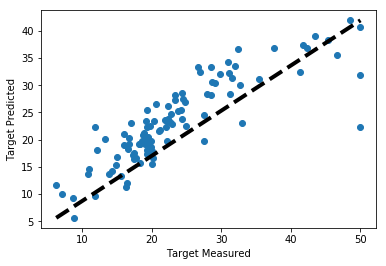

In [126]:
# 產生對應圖
# 設定X, Y的資料點
# 設定範圍
# X軸標示真實房價
# Y軸標示預測房價

## Using numpy.array instead of Pandas DataFrame 

使用DataFrame方便檢視，也可以直接使用Numpy陣列<br>
以下是簡化版本的建模以及預測

In [127]:
import numpy as np

X = np.array(boston.data)
y = np.array(boston.target)
print(X.shape, y.shape)

(506, 13) (506,)


In [128]:
linear_regression_model = linear_model.LinearRegression()
y_lr_prediction = cross_val_predict(linear_regression_model, X, y, cv=10)

## 不使用單一固定的訓練測試資料集設定 (預設Cross-Validation分割訓練測試) 
所以y_lr_prediction與上面y_prediction不對應到相同的資料

In [129]:
y_lr_prediction[:10]

array([30.04900564, 24.73268691, 30.36234996, 28.32103823, 27.54679474,
       24.95005201, 22.76828807, 18.96826752, 10.69099639, 18.38869103])

In [130]:
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

## Plotting code 製圖參考程式碼來自於
https://scikit-learn.org/0.15/auto_examples/plot_cv_predict.html

Text(0,0.5,'Predicted')

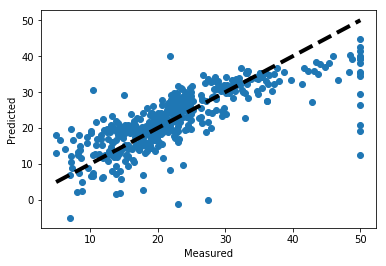

In [131]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict # fix
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig,ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# fig.show()